In [23]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [24]:
df = pd.read_csv("data/cmc.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


In [30]:
df = pd.concat([pd.get_dummies(df[6], prefix='job'), df.drop(6, axis=1)], axis=1)

In [31]:
X, y = preprocessing.XySplit(df, 9)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
y.describe()

count    1473.000000
mean        1.919891
std         0.876376
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: 9, dtype: float64

Initial Performance Testing:

[[51  8 10]
 [11 13 12]
 [11  7 25]]
0.6013513513513513


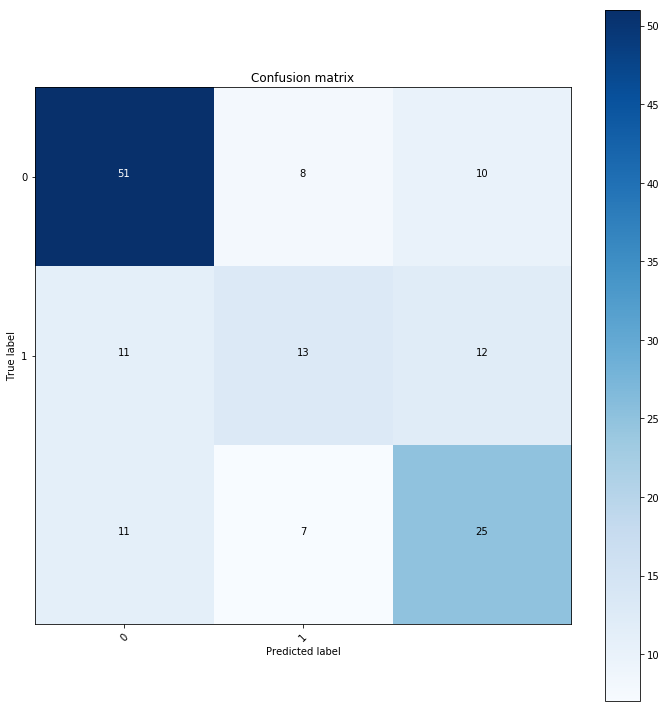

In [33]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

Processing Param Val: 0.036666666666666665
0.5584657340784299
0.003333333333333333


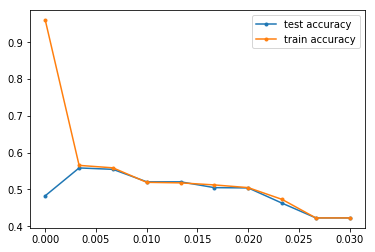

In [38]:
param = ('min_impurity_decrease', np.linspace(0, .03, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

[[38  5 13]
 [ 4 16 16]
 [21 11 24]]


(array([[38,  5, 13],
        [ 4, 16, 16],
        [21, 11, 24]], dtype=int64), 0.527027027027027)

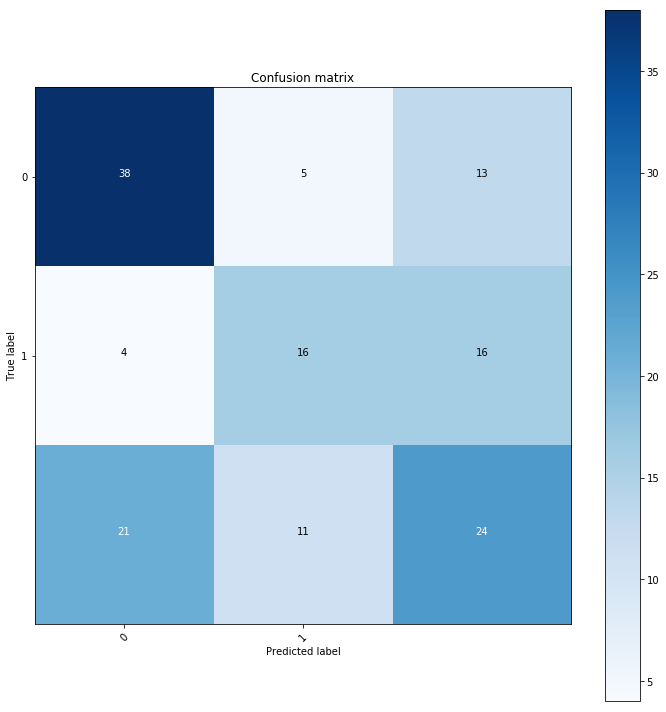

In [8]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[55  0  1]
 [36  0  0]
 [53  0  3]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[55,  0,  1],
        [36,  0,  0],
        [53,  0,  3]], dtype=int64), 0.3918918918918919)

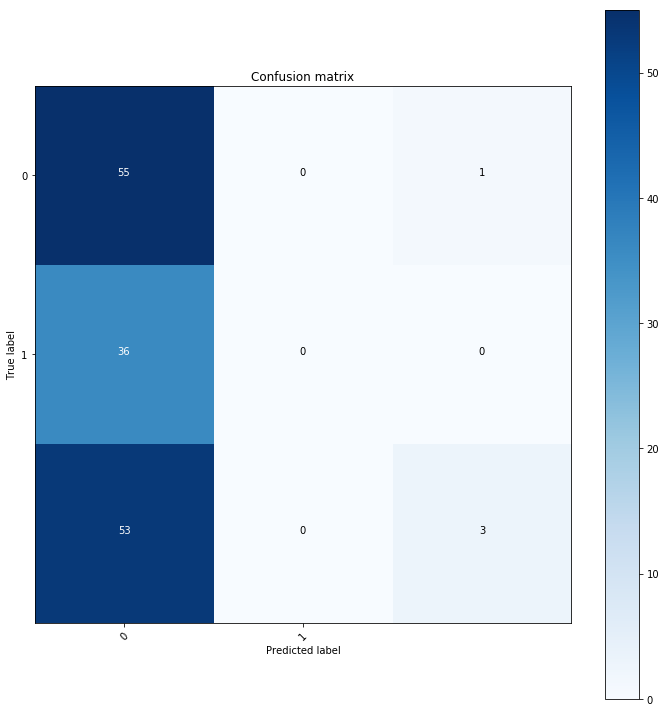

In [9]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[36  4 16]
 [ 9 17 10]
 [19  9 28]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([[36,  4, 16],
        [ 9, 17, 10],
        [19,  9, 28]], dtype=int64), 0.5472972972972973)

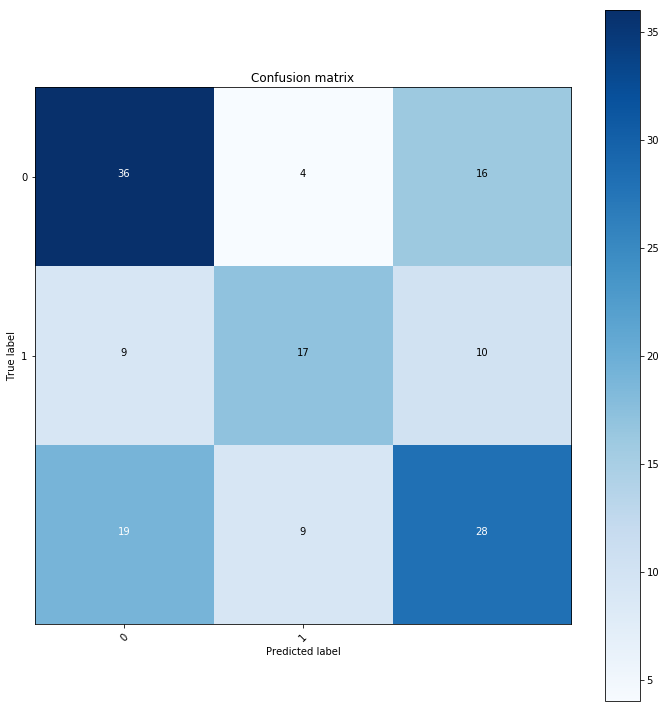

In [10]:
clf = svm.SVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/200
15216/15216 [==============================] - 3s 218us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 2/200
15216/15216 [==============================] - 3s 165us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 3/200
 6176/15216 [===========>..................] - ETA: 1s - loss: 5.7468 - acc: 0.0368

KeyboardInterrupt: 

[[36  6 14]
 [14 14  8]
 [22 13 21]]
0.4797297297297297


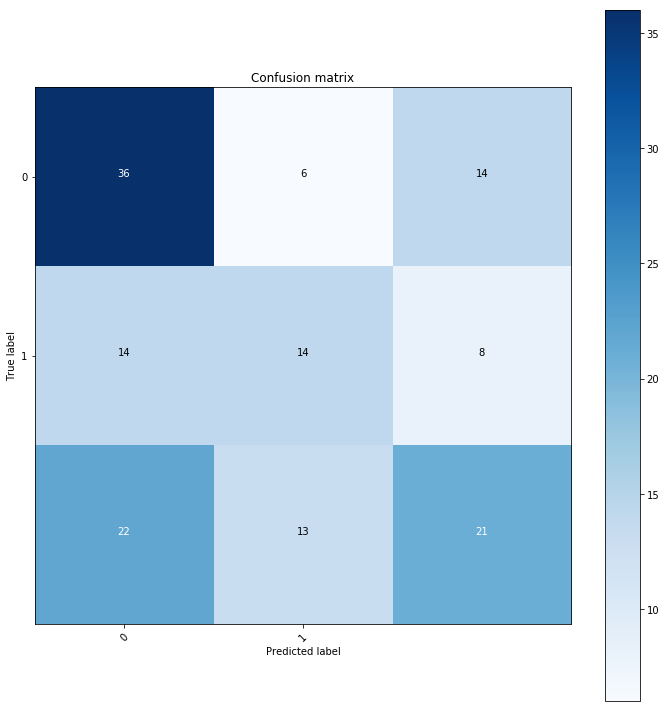

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[29  0 27]
 [ 8  0 28]
 [14  0 42]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[29,  0, 27],
        [ 8,  0, 28],
        [14,  0, 42]], dtype=int64), 0.4797297297297297)

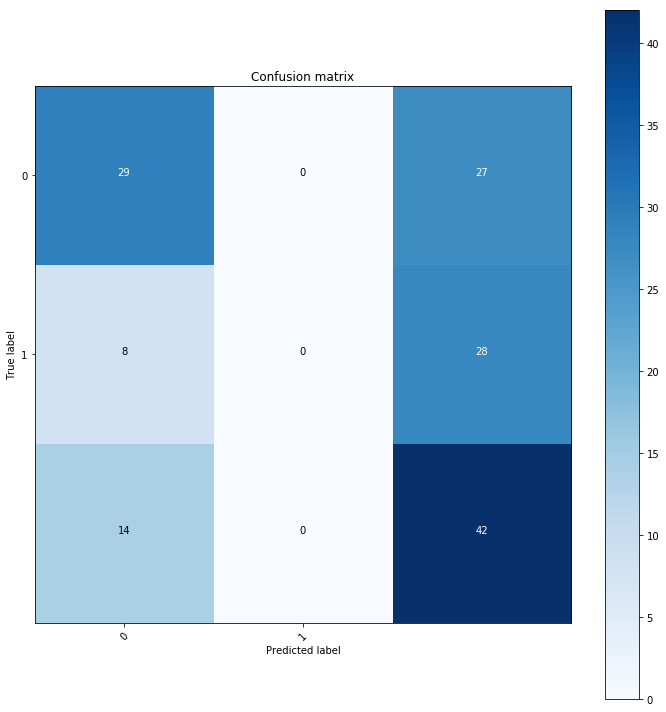

In [12]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Algorithm Testing:

Decision Tree Classifier:
Testing: Pruning parameter min_impurity_decrease
Testing: Max Depth

Processing Param Val: 0.0054444444444444444
0.5584657340784299
0.003333333333333333


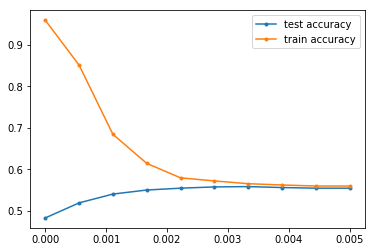

In [43]:
param = ('min_impurity_decrease', np.linspace(0, .005, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

Processing Param Val: 20.088888888888899
0.5531679650201144
5.222222222222222


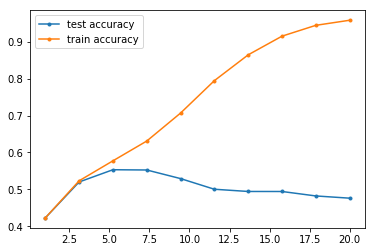

In [44]:
param = ('max_depth', np.linspace(1, 20, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="max_depth-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="max_depth-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="max_depth-vals")

Min impurity decrease with max depth did not improve performance. So I just left it out.

Processing Param Val: 0.0188888888888888896
0.5592688783026268
0.005555555555555556


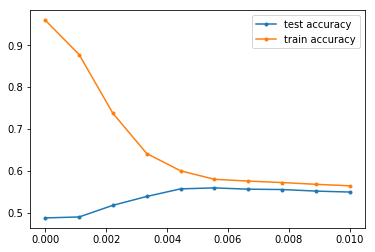

In [50]:
param = ('min_impurity_decrease', np.linspace(0, .01, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

20


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


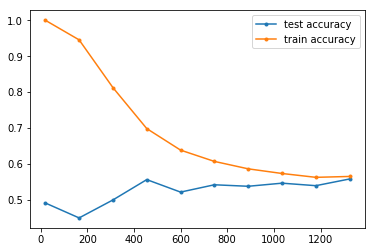

In [52]:
clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.003333333333333333)
train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, min_train_num=20)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)

[[51  2 16]
 [ 5 12 19]
 [ 6  6 31]]
0.6351351351351351


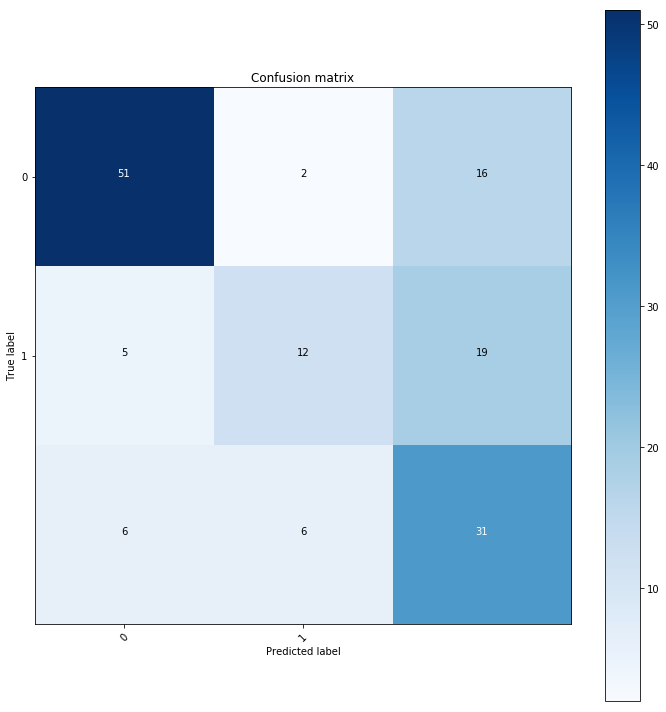

In [67]:
clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.003333333333333333)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

In [76]:
mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="tuned-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="tuned-vals")

ADA BOOST TESTING


Testing: n_estimators
learning rate?

Processing Param Val: 20
0.5485822902154762
9


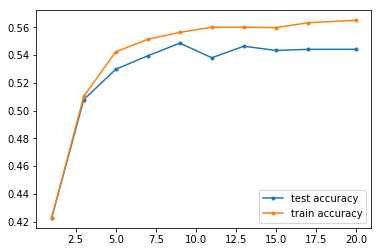

In [54]:
param = ('n_estimators', np.linspace(1, 20, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "CONTRA-ADABoost", descriptors="n_estimators-train_acc")
mlTest.saveNpArray(test_acc, "CONTRA-ADABoost", descriptors="n_estimators-test_acc")
mlTest.saveNpArray(param_vals, "CONTRA-ADABoost", descriptors="n_estimators-vals")

Processing Param Val: 20
0.5485822902154762
9


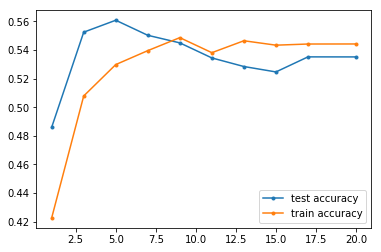

In [55]:
param = ('n_estimators', np.linspace(1, 20, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc1, test_acc1, param_vals1 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
mlTest.saveNpArray(train_acc1, "CONTRA-adaboost", descriptors="n_estimators-train_acc-depth2")
mlTest.saveNpArray(test_acc1, "CONTRA-adaboost", descriptors="n_estimators-test_acc-depth2")
mlTest.saveNpArray(param_vals1, "CONTRA-adaboost", descriptors="n_estimators-vals-depth2")

Processing Param Val: 20
0.5538855814066742
5


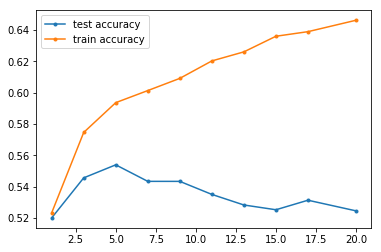

In [58]:
param = ('n_estimators', np.linspace(1, 20, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0)
train_acc3, test_acc3, param_vals3 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc3))
print(param_vals3[np.argmax(test_acc3)])
mlTest.plot_accuracy(train_acc3, test_acc3, param_vals3)
mlTest.saveNpArray(train_acc3, "CONTRA-adaboost", descriptors="learning_rate-train_acc-depth3")
mlTest.saveNpArray(test_acc3, "CONTRA-adaboost", descriptors="learning_rate-test_acc-depth3")
mlTest.saveNpArray(param_vals3, "CONTRA-adaboost", descriptors="learning_rate-vals-depth3")

Processing Param Val: 80
0.5456320798526504
1


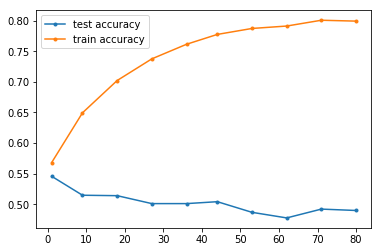

In [60]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "CONTRA-adaboost", descriptors="learning_rate-train_acc-depth4")
mlTest.saveNpArray(test_acc4, "CONTRA-adaboost", descriptors="learning_rate-test_acc-depth4")
mlTest.saveNpArray(param_vals4, "CONTRA-adaboost", descriptors="learning_rate-vals-depth4")

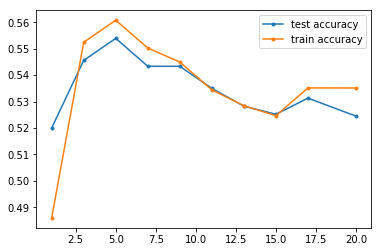

In [61]:
mlTest.plot_accuracy(test_acc1, test_acc3, param_vals3)

In [7]:
param = ('learning_rate', np.linspace(1, 0, num=10))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
# mlTest.saveNpArray(train_acc1, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth2")
# mlTest.saveNpArray(test_acc1, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth2")
# mlTest.saveNpArray(param_vals1, "MAGIC-adaboost", descriptors="learning_rate-vals-depth2")

KeyboardInterrupt: 

In [9]:
acc1 = np.load("npData/20190206-132640-MAGIC-ADABoost-n_estimators-test_acc.npy")
acc2 = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-test_acc-depth2.npy")
acc3 = np.load("npData/20190206-120107-MAGIC-adaboost-learning_rate-test_acc-depth3.npy")
acc4 = np.load("npData/20190206-120139-MAGIC-adaboost-learning_rate-test_acc-depth4.npy")

In [14]:
vals2 = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-vals-depth2.npy")

In [15]:
vals[np.argmax(acc)]

62

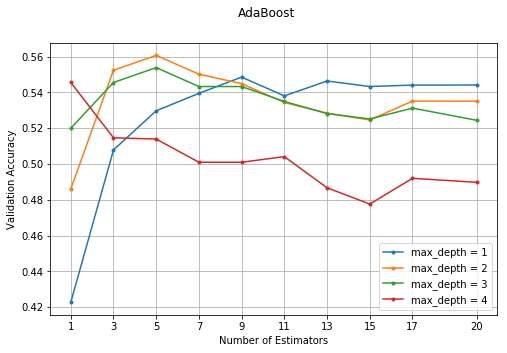

In [63]:
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.plot(param_vals, test_acc, label='max_depth = 1', marker='.')
plt.plot(param_vals, test_acc1, label='max_depth = 2', marker='.')
plt.plot(param_vals, test_acc3, label='max_depth = 3', marker='.')
plt.plot(param_vals, test_acc4, label='max_depth = 4', marker='.')
plt.legend()
plt.grid()
plt.xticks(param_vals)
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.suptitle("AdaBoost")
plt.show()

[[53  3 13]
 [14  8 14]
 [11  8 24]]


(array([[53,  3, 13],
        [14,  8, 14],
        [11,  8, 24]], dtype=int64), 0.5743243243243243)

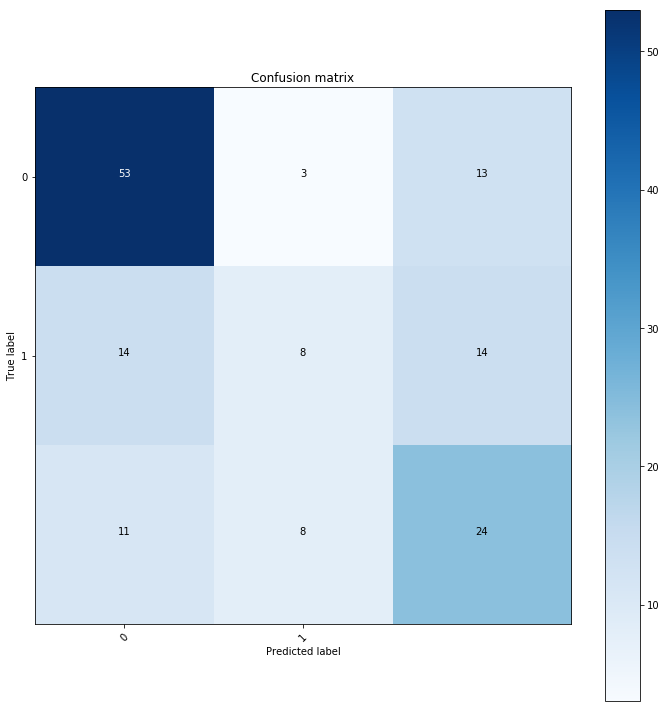

In [64]:
clf = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0, n_estimators=5)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

SVM TESTING

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



0.4905742915339504
0.01


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


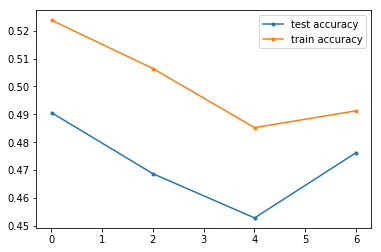

In [66]:
param = ('C', np.linspace(.01, 6, num=4))
classifier = svm.LinearSVC(random_state=0, max_iter=8000)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
#mlTest.saveNpArray(train_acc, "MAGIC-ADABoost", descriptors="n_estimators-train_acc")
#mlTest.saveNpArray(test_acc, "MAGIC-ADABoost", descriptors="n_estimators-test_acc")
#mlTest.saveNpArray(param_vals, "MAGIC-ADABoost", descriptors="n_estimators-vals")